In [1]:
# PLOT CREPE PREDICTIONS

import crepe
from scipy.signal import medfilt
import soundfile as sf
import librosa
import os
from IPython.display import Audio
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

audio_path = '/import/c4dm-datasets/VCTK-Corpus-0.92/wav48_silence_trimmed/p225/p225_001_mic1.flac'
audio, sr = sf.read(audio_path)

timestamp, frequency_prediction, confidence, activation = crepe.predict(audio, sr, viterbi=False)
# Audio(data=audio, rate=sr, autoplay=True)

7/7 [==============================] - 1s 155ms/step


In [29]:
timestamp, frequency_prediction, confidence, activation = crepe.predict(audio, sr, viterbi=False, step_size=20)
len(frequency_prediction)

4/4 [==============================] - 0s 118ms/step


103

In [6]:
# USE viterbi=False predicitons
confidence_vuv_threshold = 0.5
voiced_bool = (confidence>confidence_vuv_threshold)
unvoiced_bool = ~voiced_bool

In [7]:
def show_plot(title, array):
    print(title)
    plt.plot(array)
    plt.show()
    plt.close()

In [8]:
medfilt_frequency = medfilt(frequency_prediction,3)
voiced_flagged_frequency = medfilt_frequency.copy()
voiced_flagged_frequency[unvoiced_bool] = voiced_flagged_frequency[unvoiced_bool]=np.nan
voiced_log_freq = voiced_flagged_frequency.copy()
voiced_log_freq[voiced_bool] = np.log(voiced_log_freq[voiced_bool])
unit_var_voiced_log_freq = voiced_log_freq.copy()
unit_var_voiced_log_freq[voiced_bool] = (unit_var_voiced_log_freq[voiced_bool] - np.mean(unit_var_voiced_log_freq[voiced_bool]))/np.std(unit_var_voiced_log_freq[voiced_bool])/4
normalized_unit_var_voiced_log_freq = unit_var_voiced_log_freq.copy()
normalized_unit_var_voiced_log_freq[voiced_bool] = (normalized_unit_var_voiced_log_freq[voiced_bool] - np.min(normalized_unit_var_voiced_log_freq[voiced_bool]))/(np.max(normalized_unit_var_voiced_log_freq[voiced_bool])-np.min(normalized_unit_var_voiced_log_freq[voiced_bool]))
vector_257_normalized_unit_var_voiced_log_freq = normalized_unit_var_voiced_log_freq.copy()
vector_257_normalized_unit_var_voiced_log_freq[voiced_bool] = np.rint(vector_257_normalized_unit_var_voiced_log_freq[voiced_bool]*256)+1
vector_257_vuv_normalized_unit_var_log_freq = vector_257_normalized_unit_var_voiced_log_freq.copy()
vector_257_vuv_normalized_unit_var_log_freq[unvoiced_bool] = vector_257_vuv_normalized_unit_var_log_freq[unvoiced_bool]=0
vector_257_vuv_normalized_unit_var_log_freq = vector_257_vuv_normalized_unit_var_log_freq.astype(int)
one_hot_preprocessed_pitch_conotours = np.zeros((vector_257_vuv_normalized_unit_var_log_freq.size, vector_257_vuv_normalized_unit_var_log_freq.max()+1))
one_hot_preprocessed_pitch_conotours[np.arange(vector_257_vuv_normalized_unit_var_log_freq.size),vector_257_vuv_normalized_unit_var_log_freq] = 1


original frequency_prediction prediction 
 [ 627.33979707   86.39974522   84.14550792  660.14333959  633.83598287
  633.36035235  635.2085676   645.38312559   82.8584736   598.24313624
  398.00779081  642.83867923  657.97620056  659.13332602  633.59986132
   32.23808553   32.23321841   51.84190025  633.10734208  645.57672058
  656.71790947  623.82401587  645.07205156  644.92461665  645.87330865
  649.6022737   597.91394495  530.53137046  445.51445164   32.35884876
   32.52493342  449.0665754  1782.69798932 1794.16991986 1156.64857365
  235.28410159  224.87239315  228.02719786  228.08674958  228.9178504
  229.57700817  229.85383074  230.18259992  230.484035    230.98725585
  231.79405066  232.79487555  234.093256    235.23522627  236.41586969
  236.80916291  236.89251696  236.4864593   236.18027376  235.8736061
  235.54948884  235.12927352  234.19211374  232.47945194  230.50054829
  226.70466987  219.95134725  211.94861628  205.83271663  205.89492019
  201.42145883  965.22125666 1908.37

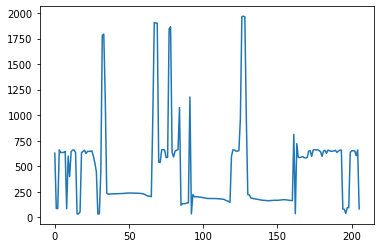

medfilt_frequency 
 [  86.39974522   86.39974522   86.39974522  633.83598287  633.83598287
  633.83598287  635.2085676   635.2085676   598.24313624  398.00779081
  598.24313624  642.83867923  657.97620056  657.97620056  633.59986132
   32.23808553   32.23808553   51.84190025  633.10734208  645.57672058
  645.57672058  645.07205156  644.92461665  645.07205156  645.87330865
  645.87330865  597.91394495  530.53137046  445.51445164   32.52493342
   32.52493342  449.0665754  1782.69798932 1782.69798932 1156.64857365
  235.28410159  228.02719786  228.02719786  228.08674958  228.9178504
  229.57700817  229.85383074  230.18259992  230.484035    230.98725585
  231.79405066  232.79487555  234.093256    235.23522627  236.41586969
  236.80916291  236.80916291  236.4864593   236.18027376  235.8736061
  235.54948884  235.12927352  234.19211374  232.47945194  230.50054829
  226.70466987  219.95134725  211.94861628  205.89492019  205.83271663
  205.89492019  965.22125666 1902.70947955 1902.70947955 19

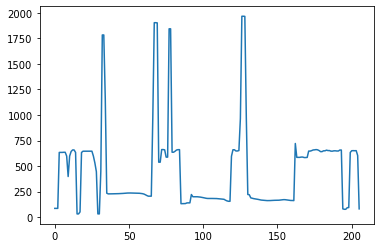

voiced_flagged_frequency 
 [         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan 228.02719786 228.08674958 228.9178504
 229.57700817 229.85383074 230.18259992 230.484035   230.98725585
 231.79405066 232.79487555 234.093256   235.23522627 236.41586969
 236.80916291 236.80916291 236.4864593  236.18027376 235.8736061
 235.54948884 235.12927352 234.19211374 232.47945194 230.50054829
 226.70466987 219.95134725          nan 205.89492019          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          na

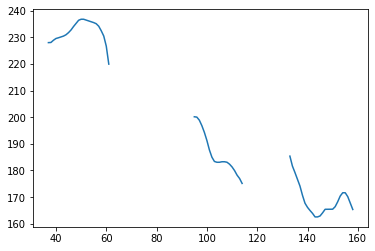

voiced_log_freq 
 [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 5.42946491 5.42972604 5.43336321 5.43623852 5.43744359
 5.43887291 5.4401816  5.44236254 5.44584926 5.4501577  5.45571957
 5.46058598 5.46559241 5.4672546  5.4672546  5.46589095 5.46459539
 5.46329609 5.46192104 5.46013546 5.45614178 5.44880184 5.44025324
 5.42364816 5.39340637        nan 5.32736594        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan

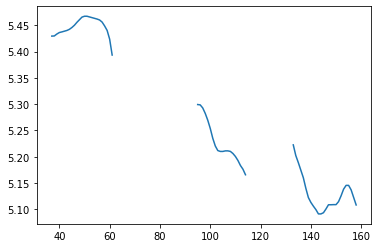

normalized_unit_var_voiced_log_freq 
 [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.8995406  0.90023477 0.90990376 0.91754744 0.92075097
 0.92455064 0.92802964 0.93382742 0.94309646 0.95454993 0.96933549
 0.98227226 0.99558128 1.         1.         0.99637491 0.9929308
 0.98947679 0.98582136 0.98107463 0.97045789 0.95094554 0.9282201
 0.88407745 0.80368325        nan 0.62812259        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan    

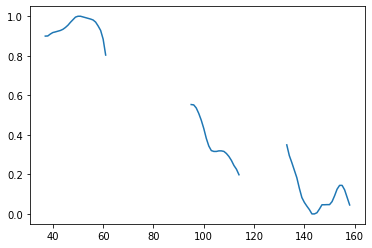

vector_257_vuv_normalized_unit_var_log_freq 
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 230. 231. 233. 235. 236.
 237. 238. 239. 241. 244. 248. 251. 255. 256. 256. 255. 254. 253. 252.
 251. 248. 243. 238. 226. 206.   0. 161.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 142. 142. 138.
 131. 122. 111.  99.  89.  83.  82.  82.  82.  82.  82.  79.  75.  70.
  63.  59.  52.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 205.   0.  90.  76.  67.  58.  48.  34.  22.
  16.  11.   7.   1.   1.   3.   7.  13.  13.  13.  13.  17.  24.  33.
  38.  38.  32.  22.  13.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 

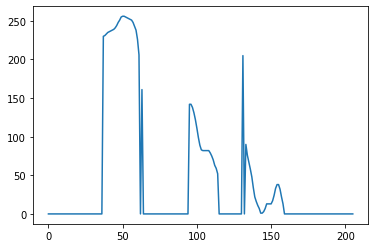

one_hot_preprocessed_pitch_conotours 
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [17]:
print('original frequency_prediction prediction','\n', frequency_prediction,'\n')
show_plot('original frequency_prediction prediction',frequency_prediction)

medfilt_frequency = medfilt(frequency_prediction,3)
print('medfilt_frequency','\n', medfilt_frequency,'\n')
show_plot('medfilt_frequency',medfilt_frequency)

voiced_flagged_frequency = medfilt_frequency.copy()
voiced_flagged_frequency[unvoiced_bool] = voiced_flagged_frequency[unvoiced_bool]=np.nan
print('voiced_flagged_frequency','\n', voiced_flagged_frequency,'\n')
show_plot('voiced_flagged_frequency',voiced_flagged_frequency)

# unvoiced_zerod_medfilt_freq_cont = medfilt(voiced_flagged_frequency,3)        
# print('unvoiced_zerod_medfilt_freq_cont','\n', unvoiced_zerod_medfilt_freq_cont,'\n')

voiced_log_freq = voiced_flagged_frequency.copy()
# unvoiced_medfilt_freq_cont = unvoiced_medfilt_freq_cont+1e-7 # not necessary if only performing operations on voiced
voiced_log_freq[voiced_bool] = np.log(voiced_log_freq[voiced_bool])
print('voiced_log_freq','\n', voiced_log_freq,'\n')
show_plot('voiced_log_freq',voiced_log_freq)

normalized_unit_var_voiced_log_freq = voiced_log_freq.copy()
normalized_unit_var_voiced_log_freq[voiced_bool] = (normalized_unit_var_voiced_log_freq[voiced_bool] - np.min(normalized_unit_var_voiced_log_freq[voiced_bool]))/(np.max(normalized_unit_var_voiced_log_freq[voiced_bool])-np.min(normalized_unit_var_voiced_log_freq[voiced_bool]))
print('normalized_unit_var_voiced_log_freq','\n',normalized_unit_var_voiced_log_freq,'\n')
show_plot('normalized_unit_var_voiced_log_freq',normalized_unit_var_voiced_log_freq)

vector_257_normalized_unit_var_voiced_log_freq = normalized_unit_var_voiced_log_freq.copy()
vector_257_normalized_unit_var_voiced_log_freq[voiced_bool] = np.rint(vector_257_normalized_unit_var_voiced_log_freq[voiced_bool]*255)+1
vector_257_vuv_normalized_unit_var_log_freq = vector_257_normalized_unit_var_voiced_log_freq.copy()
vector_257_vuv_normalized_unit_var_log_freq[unvoiced_bool] = vector_257_vuv_normalized_unit_var_log_freq[unvoiced_bool]=0
print('vector_257_vuv_normalized_unit_var_log_freq','\n',vector_257_vuv_normalized_unit_var_log_freq,'\n')
show_plot('vector_257_vuv_normalized_unit_var_log_freq',vector_257_vuv_normalized_unit_var_log_freq)

vector_257_vuv_normalized_unit_var_log_freq = vector_257_vuv_normalized_unit_var_log_freq.astype(int)
one_hot_preprocessed_pitch_conotours = np.zeros((vector_257_vuv_normalized_unit_var_log_freq.size, vector_257_vuv_normalized_unit_var_log_freq.max()+1))
one_hot_preprocessed_pitch_conotours[np.arange(vector_257_vuv_normalized_unit_var_log_freq.size),vector_257_vuv_normalized_unit_var_log_freq] = 1
one_hot_preprocessed_pitch_conotours
print('one_hot_preprocessed_pitch_conotours','\n',one_hot_preprocessed_pitch_conotours)


In [24]:
one_hot_preprocessed_pitch_conotours[57]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

original frequency_prediction prediction


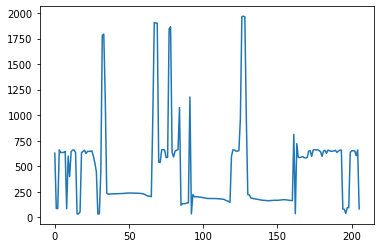

medfilt_frequency


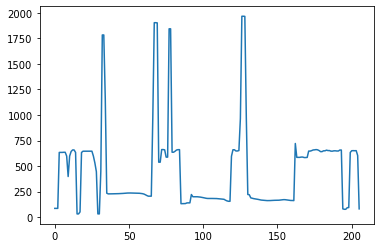

voiced_flagged_frequency


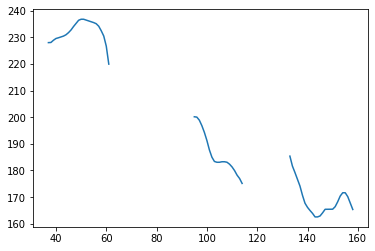

voiced_log_freq


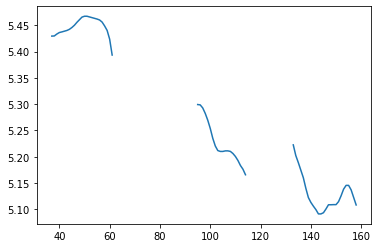

unit_var_voiced_log_freq


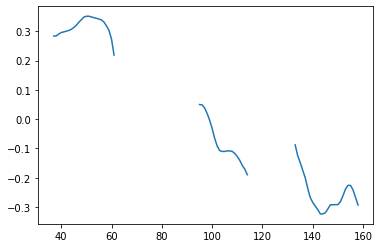

normalized_unit_var_voiced_log_freq


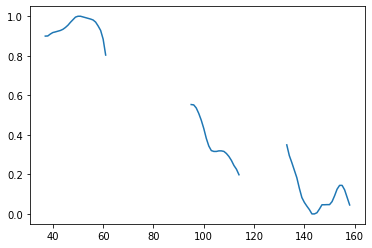

vector_257_vuv_normalized_unit_var_log_freq


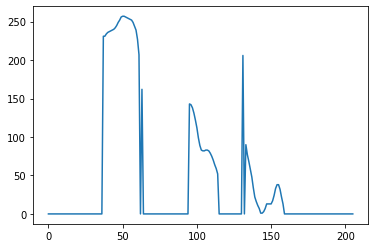

In [13]:
show_plot('original frequency_prediction prediction',frequency_prediction)
show_plot('medfilt_frequency',medfilt_frequency)
show_plot('voiced_flagged_frequency',voiced_flagged_frequency)
show_plot('voiced_log_freq',voiced_log_freq)
show_plot('unit_var_voiced_log_freq',unit_var_voiced_log_freq)
show_plot('normalized_unit_var_voiced_log_freq',normalized_unit_var_voiced_log_freq)
show_plot('vector_257_vuv_normalized_unit_var_log_freq',vector_257_vuv_normalized_unit_var_log_freq)
Audio(data=audio, rate=sr, autoplay=True)